In [ ]:
# pip install fredapi
# pip install dotenv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os

plt.style.use('fivethirtyeight')
pd.set_option('isplay.max_columns', 500)
color_par = plt.rcParams["axes.prop_cycle"].by_key()['color']

from fredapi import Fred
from dotenv import load_dotenv
load_dotenv()
API_KEY = os.getenv("API_KEY")

In [3]:
fred = Fred(api_key=API_KEY)

In [4]:
df = fred.search('S&P', order_by='popularity')
df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-03-23,2025-03-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-03-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-21 08:26:04-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-03-23,2025-03-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-02-25 08:11:20-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-03-23,2025-03-23,S&P 500,2015-03-23,2025-03-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-03-21 19:12:01-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-03-23,2025-03-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-03-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-21 08:26:07-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-03-23,2025-03-23,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-03-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-21 08:33:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


<Axes: title={'center': 'S&P 500'}>

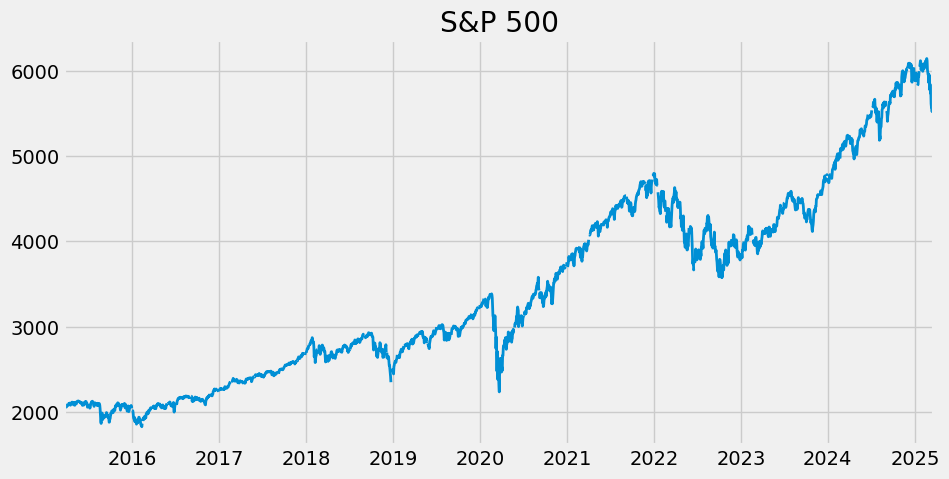

In [5]:
sp500  = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), lw=2, title="S&P 500")

In [6]:
unemp_df = fred.search("unemployement rate state", filter=('frequency', 'Monthly'))
unemp_df.head()


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-03-23,2025-03-23,Unemployment Rate,1948-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:46:04-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-03-23,2025-03-23,Unemployment Rate,1948-01-01,2025-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-03-07 07:46:04-06:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-03-23,2025-03-23,Unemployment Rate - Black or African American,1972-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:48:10-06:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2025-03-23,2025-03-23,Unemployment Level,1948-01-01,2025-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-03-07 07:46:19-06:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-03-23,2025-03-23,Unemployment Level,1948-01-01,2025-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-03-07 07:47:11-06:00,27,The series comes from the 'Current Population ...


In [7]:
unemp_df = unemp_df.query('(seasonal_adjustment == "Seasonally Adjusted") and (units== "Percent")')

In [8]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.shape

(46, 15)

In [9]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [10]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid).to_frame(name=myid)
    all_results.append(results)

In [11]:
not_req_col = unemp_df.index[unemp_df.index.str.contains(r'\d')].to_list()
final_result = pd.concat(all_results, axis='columns').drop(columns=not_req_col + ['UNRATE'], axis='columns')
final_result.dropna(inplace=True)
final_result

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR
1976-01-01,9.2,5.8,10.3,9.6,8.1,8.1,9.9,6.7,10.6,6.5,6.6,10.2,8.4,5.8,10.2,5.8,6.0,5.6,7.3,8.6,5.9,6.0,8.5,6.5,9.5,7.4,9.2,7.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.6,6.5,6.6,10.2,8.4,5.8,10.2,5.8,6.0,5.6,7.3,8.6,5.9,6.0,8.5,6.5,9.5,7.4,9.2,7.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.6,6.5,6.6,10.2,8.3,5.7,10.2,5.8,6.0,5.6,7.3,8.6,5.8,6.0,8.5,6.5,9.4,7.4,9.2,7.3
1976-04-01,9.0,5.9,10.2,9.5,8.1,7.9,9.8,6.5,10.4,6.3,6.6,10.3,8.2,5.6,10.0,5.7,5.9,5.6,7.1,8.6,5.7,6.0,8.5,6.5,9.3,7.4,9.0,7.2
1976-05-01,8.9,6.0,10.2,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.6,5.8,5.5,7.0,8.6,5.6,5.9,8.5,6.6,9.1,7.4,8.8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-01,5.5,4.2,4.4,3.5,3.7,4.4,5.1,3.3,4.2,3.7,5.0,4.6,3.6,4.5,3.8,3.0,2.9,5.3,4.5,4.3,3.1,3.7,4.4,3.2,4.2,4.1,5.7,3.5
2024-10-01,5.5,4.2,4.4,3.5,3.7,4.5,5.2,3.3,4.2,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.5,4.4,3.0,3.7,4.4,3.2,4.3,4.1,5.8,3.6
2024-11-01,5.5,4.2,4.4,3.5,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.4,4.4,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2024-12-01,5.5,4.2,4.4,3.4,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.8,3.1,2.9,5.3,4.4,4.3,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6


In [ ]:
col_names = unemp_df['title'].str.replace('Unemployment Rate in ', '')
final_result.columns = [col_names[name] for name in final_result.columns]
final_result.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas'],
      dtype='object')

In [13]:
px.line(final_result, title='States Unemployment Rate')

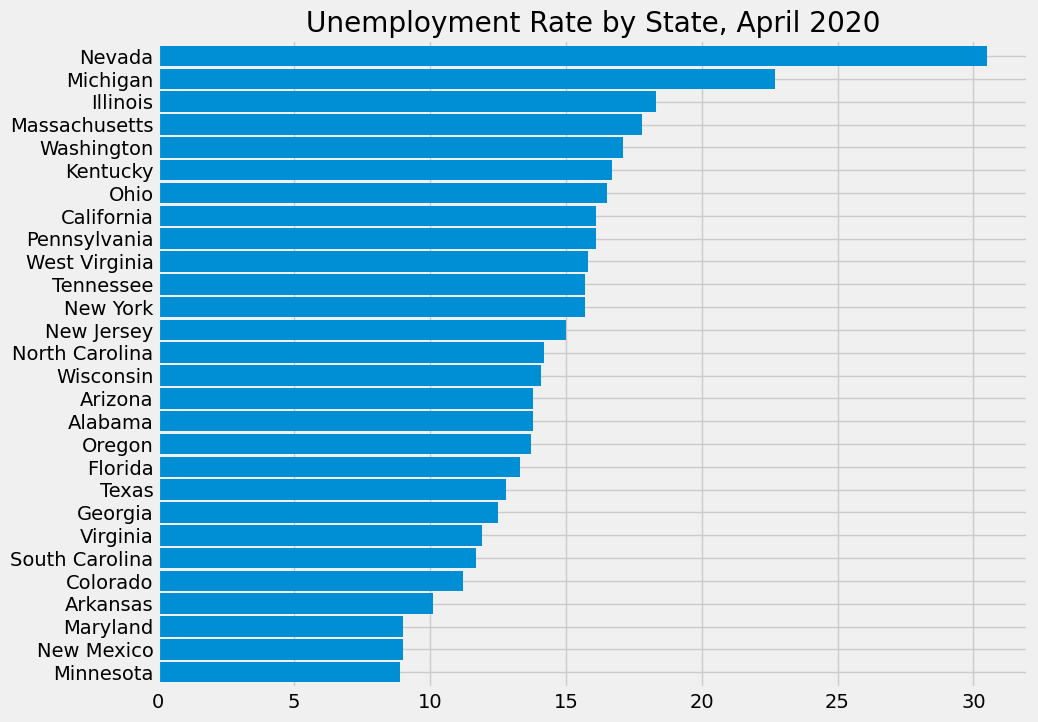

In [18]:
ax = final_result.loc[final_result.index == '2020-04'].T\
    .sort_values(by='2020-04-01')\
    .plot(figsize=(10, 8), kind= 'barh', title='Unemployment Rate by State, April 2020', width=0.9)
ax.legend().remove()
plt.show()

In [27]:
part_df = fred.search("participation rate state", filter=('frequency', 'Monthly'))
part_df = part_df.query('(seasonal_adjustment == "Seasonally Adjusted") and (units== "Percent")')
part_df = part_df.loc[part_df['id'].str.contains('LBSSA')]
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2025-03-23,2025-03-23,Labor Force Participation Rate for California,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 09:01:46-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2025-03-23,2025-03-23,Labor Force Participation Rate for Alabama,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 09:01:44-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2025-03-23,2025-03-23,Labor Force Participation Rate for New York,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 09:02:02-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2025-03-23,2025-03-23,Labor Force Participation Rate for Michigan,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 09:01:55-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2025-03-23,2025-03-23,Labor Force Participation Rate for Mississippi,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 09:01:56-05:00,21,A state's labor-force participation rate is th...


In [29]:
part_df['title'] = part_df['title'].str.replace('Labor Force Participation Rate for ', '')

In [ ]:
all_part_results = []

for myid in part_df.index:
    results = fred.get_series(myid).to_frame(name=part_df.loc[myid, 'title'])
    all_part_results.append(results)


[            California
 1976-01-01        62.5
 1976-02-01        62.4
 1976-03-01        62.2
 1976-04-01        62.2
 1976-05-01        62.2
 ...                ...
 2024-09-01        62.1
 2024-10-01        62.1
 2024-11-01        62.1
 2024-12-01        62.1
 2025-01-01        62.1
 
 [589 rows x 1 columns],
             Alabama
 1976-01-01     57.1
 1976-02-01     56.9
 1976-03-01     56.8
 1976-04-01     56.8
 1976-05-01     56.8
 ...             ...
 2024-09-01     57.7
 2024-10-01     57.7
 2024-11-01     57.6
 2024-12-01     57.6
 2025-01-01     57.6
 
 [589 rows x 1 columns],
             New York
 1976-01-01      58.1
 1976-02-01      58.0
 1976-03-01      58.0
 1976-04-01      58.0
 1976-05-01      58.1
 ...              ...
 2024-09-01      60.9
 2024-10-01      60.9
 2024-11-01      60.9
 2024-12-01      60.9
 2025-01-01      60.8
 
 [589 rows x 1 columns],
             Michigan
 1976-01-01      61.6
 1976-02-01      61.5
 1976-03-01      61.5
 1976-04-01      61.6
 1976

In [35]:
part_final_df = pd.concat(all_part_results, axis=1)
part_final_df.head()

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.5,57.1,58.1,61.6,58.8,63.7,55.8,60.5,61.7,65.6,58.4,64.8,65.5,64.3,52.5,59.7,62.1,63.1,66.6,63.8,56.9,65.3,67.3,62.8,65.9,64.0,60.5,61.5,64.4,69.3,61.0,59.5,60.6,63.1,57.9,59.4,64.7,69.9,71.4,62.5,63.0,65.8,63.7,64.1,62.7,64.8,65.2,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.6,60.3,61.6,65.5,58.3,64.7,65.4,64.1,52.4,59.5,61.9,63.0,66.4,63.6,56.7,65.2,67.1,62.6,65.7,63.9,60.4,61.4,64.3,68.6,60.8,59.2,60.4,62.9,57.8,59.3,64.6,69.7,70.8,62.4,62.8,65.6,63.5,64.0,62.5,64.7,65.1,63.7,64.5,62.6,65.0
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.3,55.5,60.2,61.6,65.5,58.3,64.6,65.3,64.1,52.3,59.4,61.9,62.9,66.3,63.5,56.5,65.0,66.9,62.5,65.5,63.8,60.3,61.4,64.2,68.1,60.6,59.1,60.2,62.8,57.8,59.2,64.6,69.6,70.5,62.3,62.6,65.5,63.4,63.9,62.4,64.6,65.0,63.7,64.6,62.6,64.8
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.4,55.4,60.2,61.6,65.5,58.3,64.6,65.3,64.1,52.3,59.3,61.8,62.9,66.3,63.6,56.5,64.9,66.7,62.5,65.4,63.8,60.4,61.5,64.1,68.2,60.7,59.1,60.1,62.8,57.7,59.1,64.6,69.4,70.5,62.1,62.5,65.6,63.6,64.1,62.5,64.6,65.1,63.7,64.6,62.5,65.0
1976-05-01,62.2,56.8,58.1,61.7,58.5,63.6,55.3,60.1,61.5,65.6,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.5,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,68.2,60.9,59.2,60.2,62.9,57.8,59.0,64.6,69.3,70.6,62.0,62.6,66.0,63.7,64.3,62.6,64.6,65.2,63.7,64.4,62.5,65.2


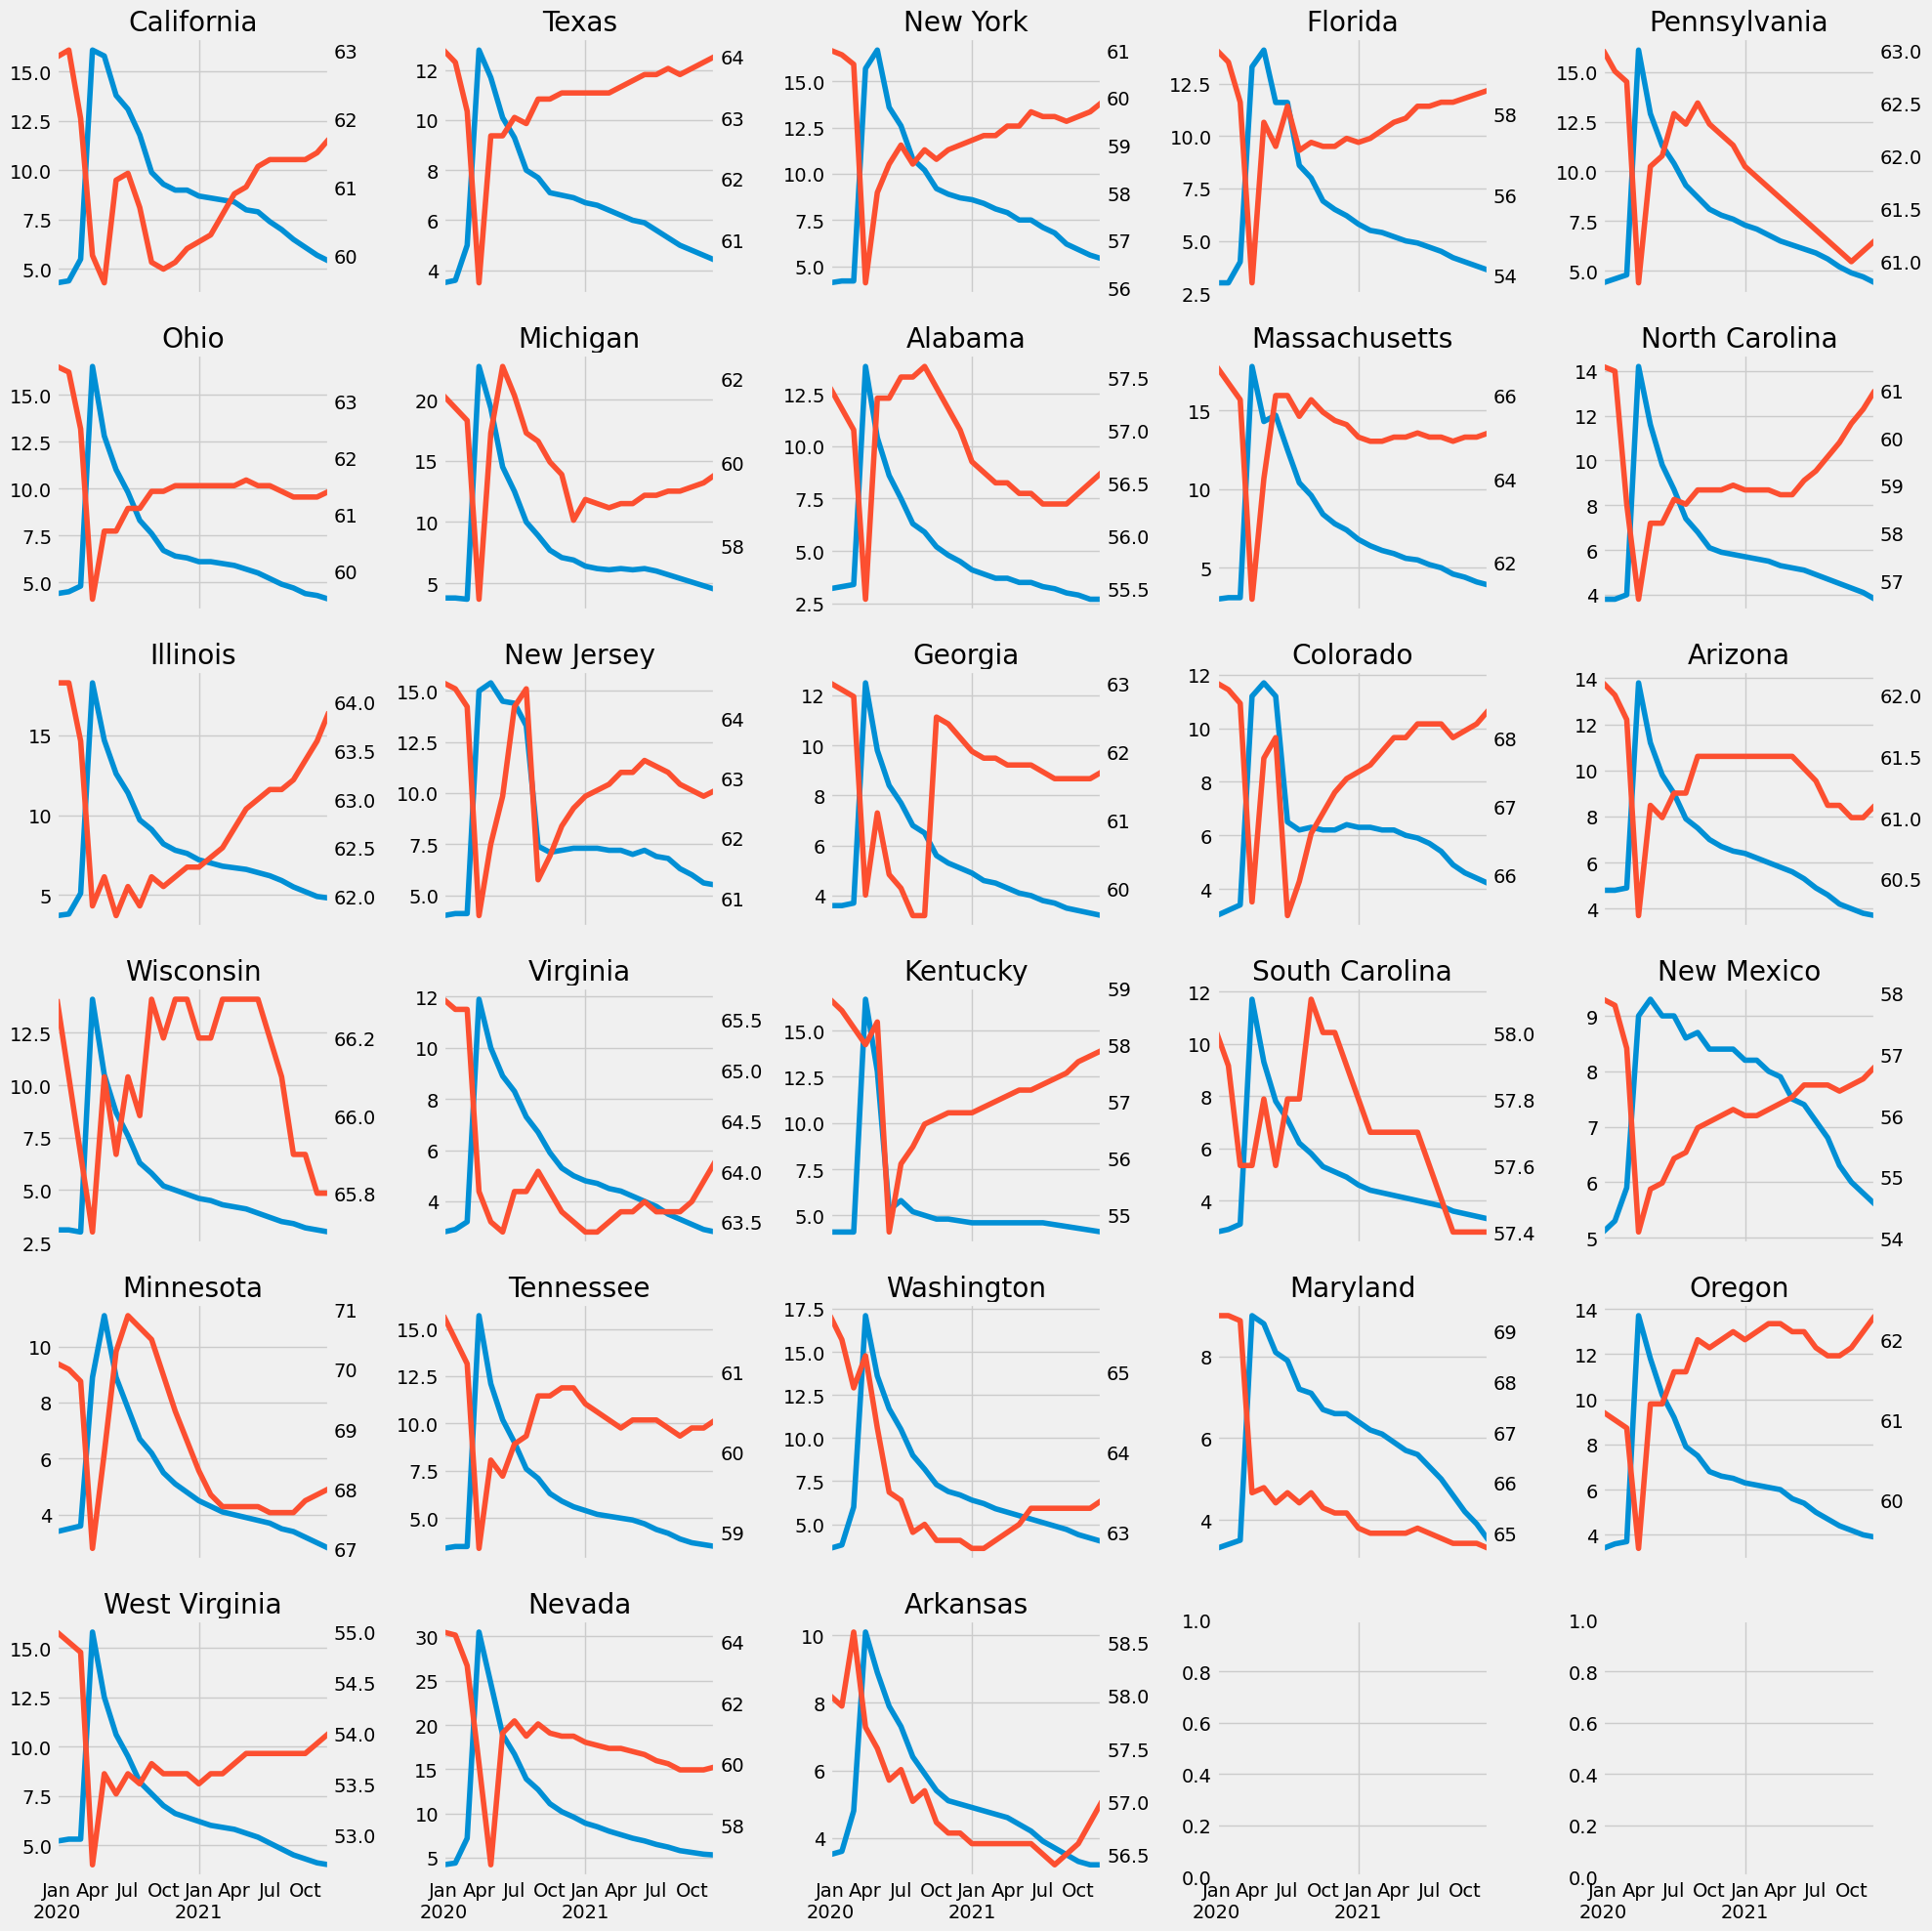

In [47]:
fig, axs = plt.subplots(6, 5, figsize=(20, 20), sharex=True)
axs = axs.flatten()
i = 0
for state in final_result.columns:
    ax2 = axs[i].twinx()
    final_result.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=axs[i], label='Unemployment')
    part_final_df.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=ax2, label='Participation', color=color_par[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()